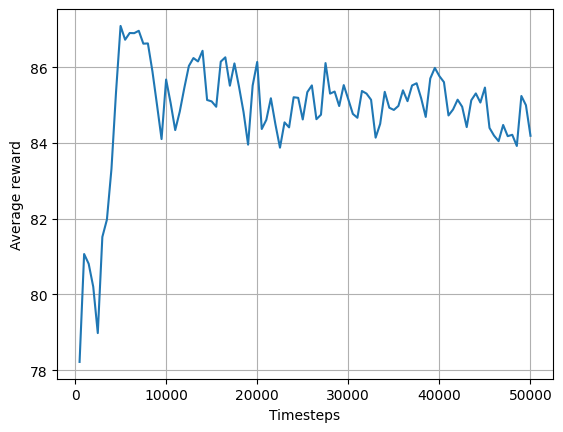

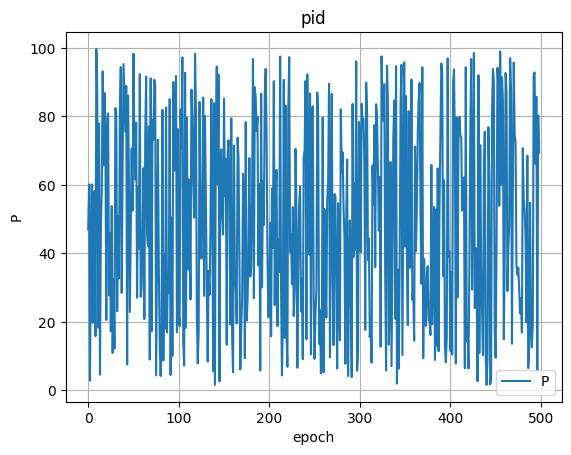

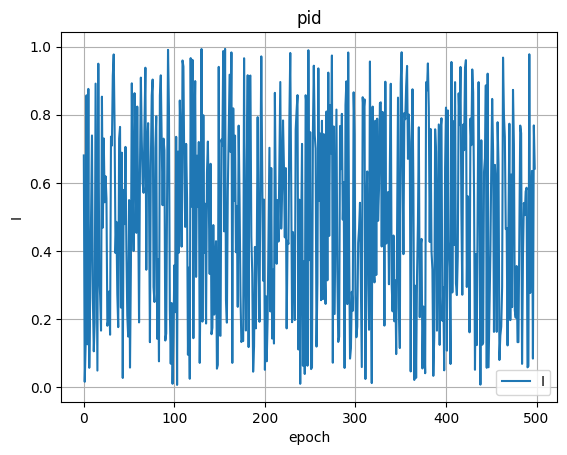

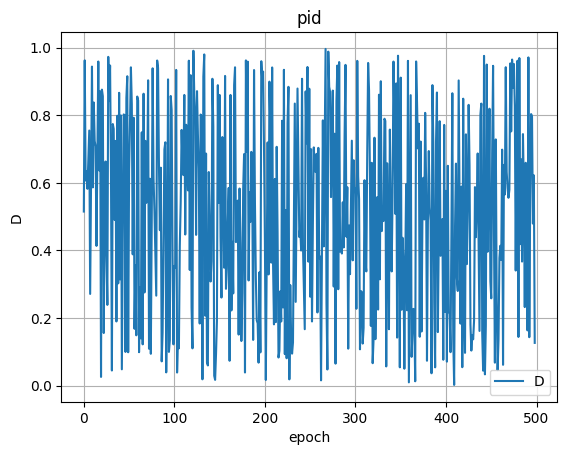

total_reward 987.5753479011728


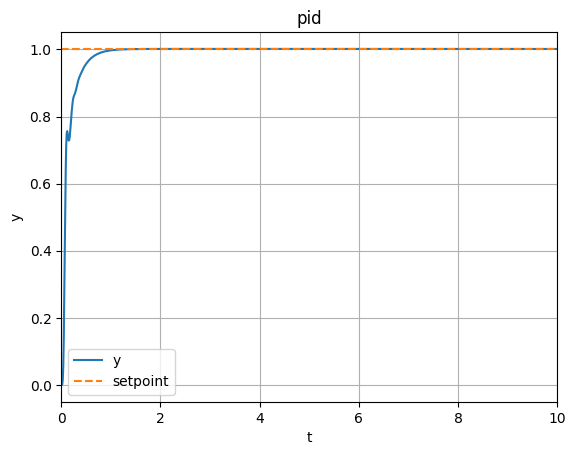

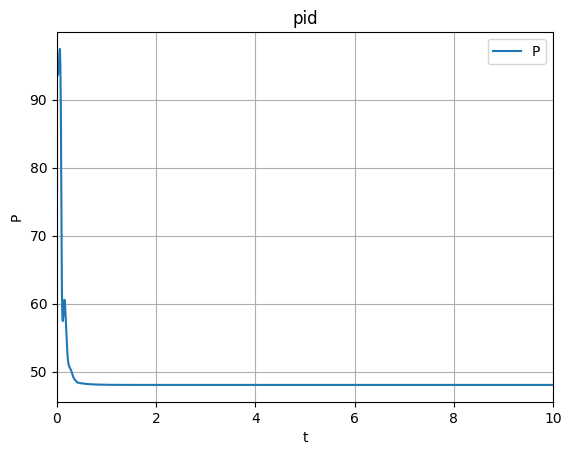

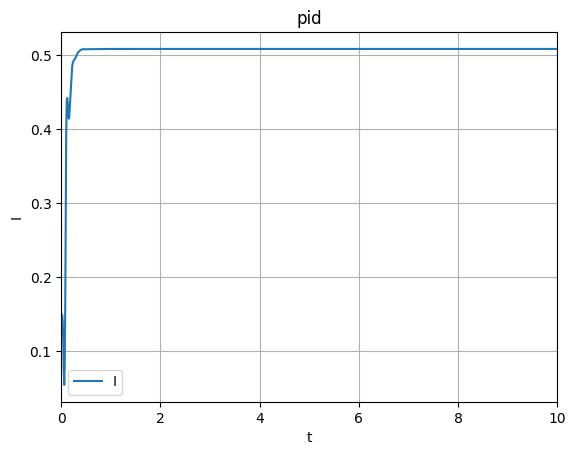

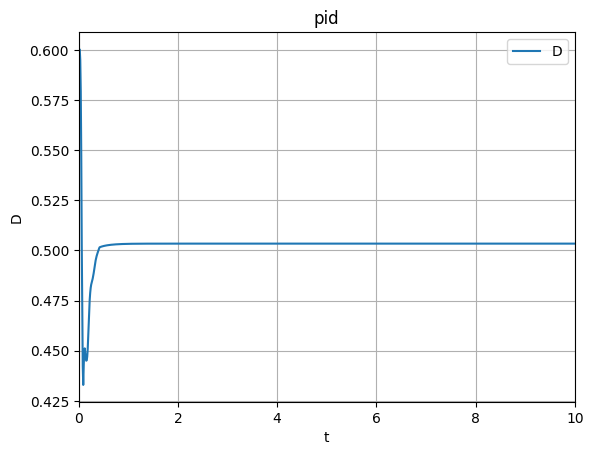

In [3]:
# %%
import joblib
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
from stable_baselines3 import SAC
from environment import CustomPID
import os
# os.chdir(os.path.dirname(os.path.realpath(__file__)))
seed = 0
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

env = CustomPID(sim_time=10)
# 绘制训练过程中的结果
data = np.load('logs_sac/evaluations.npz')
timesteps = data['timesteps']
results = data['results']
ep_lengths = data['ep_lengths']

plt.plot(timesteps, results[:, 0])
plt.xlabel('Timesteps')
plt.ylabel('Average reward')
plt.grid(True)
plt.show()

# plt.plot(timesteps, ep_lengths[:, 0])
# plt.xlabel('Timesteps')
# plt.ylabel('ep_lengths')
# plt.grid(True)
# plt.show()

# %%
all_actions = joblib.load('logs_sac/actions.npy')
PID_train_list = []
epoch_list = []
sample_timepoint = 80  # 控制律100hz 使用第50个数据点数据， 就是0.5s
for epoch, actions in enumerate(all_actions):
    if (len(actions) < sample_timepoint):
        continue
    PID_train_list.append(actions[sample_timepoint-1])
    epoch_list.append(epoch)

PID_train_list = np.array(PID_train_list)
plt.plot(epoch_list, PID_train_list[:, 0], label='P')
plt.xlabel('epoch')
plt.ylabel('P')
plt.title('pid')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(epoch_list, PID_train_list[:, 1], label='I')
plt.xlabel('epoch')
plt.ylabel('I')
plt.title('pid')
plt.grid(True)
plt.legend()
plt.show()

plt.plot(epoch_list, PID_train_list[:, 2], label='D')
plt.xlabel('epoch')
plt.ylabel('D')
plt.title('pid')
plt.grid(True)
plt.legend()
plt.show()



# 测试训练好的模型
model = SAC.load('logs_sac/best_model.zip')
obs, terminated, total_reward = env.reset(), False, 0
for i in range(1, env.max_episode_steps+1):
    action, _states = model.predict(obs, deterministic=True)
    # print(f"P: {action[0]}, I: {action[1]}, D: {action[2]}")
    obs, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    if terminated or truncated:
        break
print("total_reward", total_reward)

plt.plot(env.t[:env.step_num], env.y[:env.step_num], label='y')
plt.plot(env.t[:env.step_num], np.ones(env.step_num) * env.setpoint, '--', label='setpoint')
plt.xlabel('t')
plt.ylabel('y')
plt.title('pid')
plt.grid(True)
plt.legend()
plt.xlim(0, env.sim_time)
plt.show()

PID = np.array(env.actions)
plt.plot(env.t[:env.step_num], PID[:, 0], label='P')
plt.xlabel('t')
plt.ylabel('P')
plt.title('pid')
plt.grid(True)
plt.legend()
plt.xlim(0, env.sim_time)
plt.show()


plt.plot(env.t[:env.step_num], PID[:, 1], label='I')
plt.xlabel('t')
plt.ylabel('I')
plt.title('pid')
plt.grid(True)
plt.legend()
plt.xlim(0, env.sim_time)
plt.show()


plt.plot(env.t[:env.step_num], PID[:, 2], label='D')
plt.xlabel('t')
plt.ylabel('D')
plt.title('pid')
plt.grid(True)
plt.legend()
plt.xlim(0, env.sim_time)
plt.show()
# %%
